In [2]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 26kB/s 
     |████████████████████████████████| 512kB 32.4MB/s 
     |████████████████████████████████| 3.8MB 29.0MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=91c7fb965af527d4b3a52823667a3cc71081a9e936395f3a34d984a67f2e43c4
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.15.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstall

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Importing our dataset

The first step to create our machine learning model is to obviously give it a dataset and clean it up a bit. Here, we load in the Iris dataset provided by University of California, Irvine. 

In [4]:
# load through url
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
data = pd.read_csv(url, names = attributes)
data.columns = attributes

This is what our Iris data looks like.

In [5]:
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Graphing the data that we are given makes it easier to visualize certain patterns between two attributes.

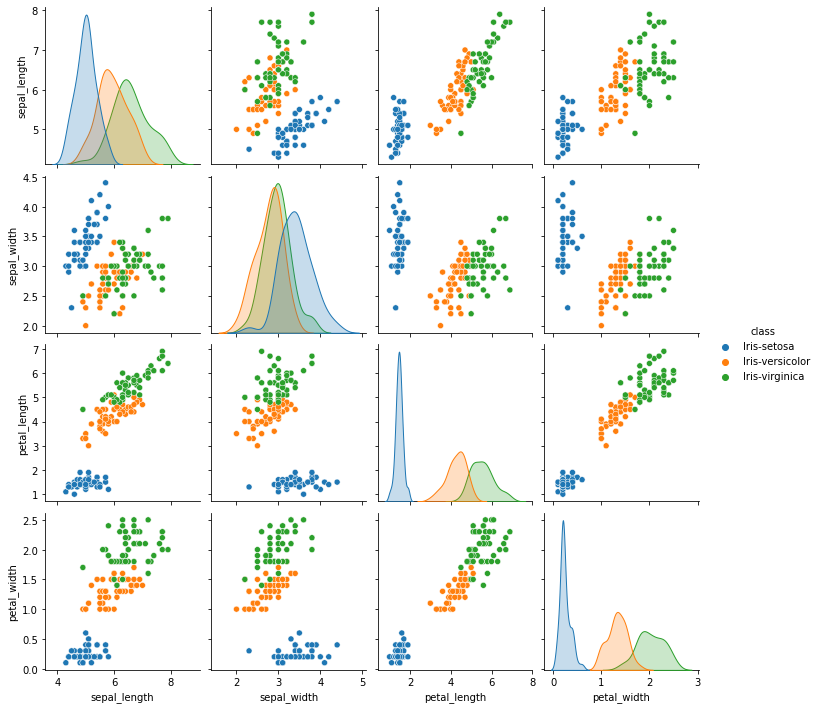

In [6]:
plotting = sns.pairplot(data, hue='class')

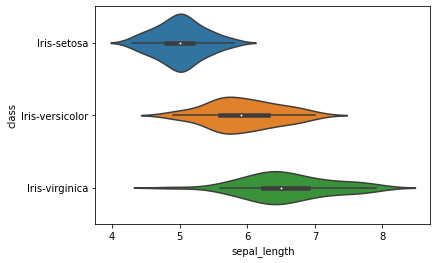

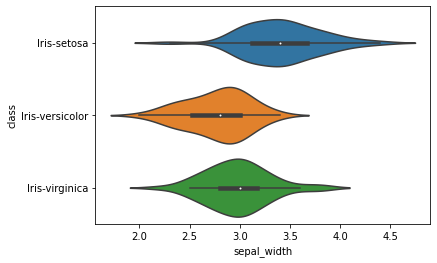

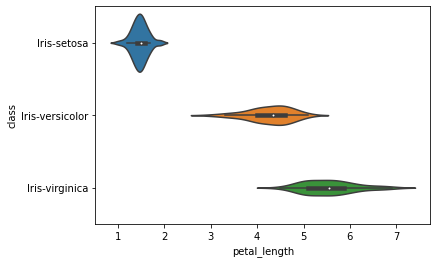

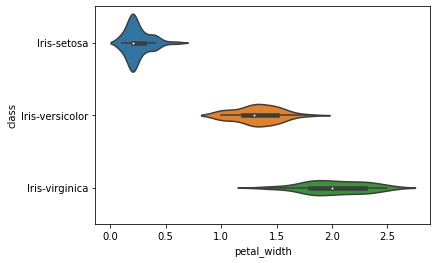

In [7]:
g = sns.violinplot(y='class', x='sepal_length', data=data)
plt.show()
g = sns.violinplot(y='class', x='sepal_width', data=data)
plt.show()
g = sns.violinplot(y='class', x='petal_length', data=data)
plt.show()
g = sns.violinplot(y='class', x='petal_width', data=data)

We drop the class column as the class is what we want our machine learning model to predict based on the 4 attributes given.

In [8]:
y = data['class']
X = data.drop(['class'], axis=1)

In [9]:
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
pip install scikit-learn

# Training the data

Here, we start to get into the fun stuff. For this model, I have decided to use the common K Nearest Neighbor classifer, otherwise known as KNN. While there are definitely more classifiers you can use, such as SVC or Logistic Regression.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

In [13]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import sklearn.linear_model as sk

In [45]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [46]:
scores

[0.9666666666666667,
 0.9166666666666666,
 0.9833333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9833333333333333,
 0.9833333333333333,
 1.0,
 0.9833333333333333,
 1.0,
 0.9833333333333333,
 1.0,
 0.9833333333333333,
 1.0,
 0.9666666666666667,
 0.9833333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.95,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

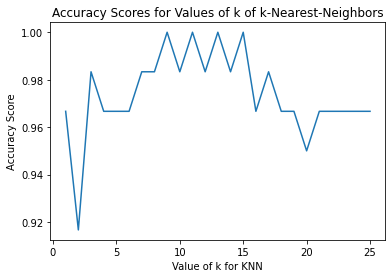

In [47]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [48]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

Here, you can input the lengths of the sepal lengths and widths, and petal lengths and widths. The model will then take in these inputs, and then, using the KNN classifier, will find the most accurate prediction.

In [49]:
knn.predict([[6, 3, 4, 2]])

array(['Iris-versicolor'], dtype=object)

And here we go! We passed in four numbers for each of the four attributes the machine learning model requires, and the model returned us the class 'veriscolor.' This means that the model best determined that a flower with a sepal length of 6, sepal width of 3, petal length of 4 and petal width of 2 is an Iris Versicolor. 

# Measuring the accuracy of the model

So how do we know that this prediction is accurate? Like we did above, we can try and graph the accuracy for the values of k in k-nearest neighbors.

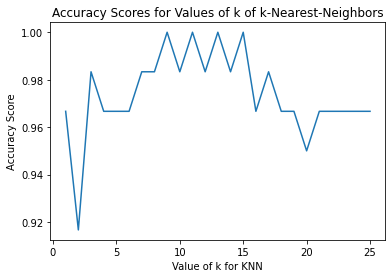

In [50]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [51]:
print("Test set score (knn.score): {:.2f}".format(knn.score(X_test, y_test)))

Test set score (knn.score): 1.00


Voila! Here, it shows that the accuracy values are around 97%. This means that the model made a right prediction for 97% of the irises given in the dataset. So for the most part, we can trust the accuracy and predictions of the machine learning model. 